## UV/vis/ECD

To compute UV/Vis spectra you call the linear response solver. We use the molecule, basis set and scf results object from the IR computation.

In [1]:
import veloxchem as vlx
molecule = vlx.Molecule.read_smiles('C[C@@H](C(=O)O)N')# CC(=O)')
molecule.show(atom_indices=True)

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

We start by optimizing the molecule.

In [2]:
basis = vlx.MolecularBasis.read(molecule, 'def2-sv(p)')
scf_drv = vlx.ScfRestrictedDriver()
scf_drv.xcfun = 'b3lyp'
results = scf_drv.compute(molecule, basis)
opt_drv = vlx.OptimizationDriver(scf_drv)
opt_results = opt_drv.compute(molecule, basis, results)

                                                                                                                          
                                            Self Consistent Field Driver Setup                                            
                                                                                                                          
                   Wave Function Model             : Spin-Restricted Kohn-Sham                                            
                   Initial Guess Model             : Superposition of Atomic Densities                                    
                   Convergence Accelerator         : Two Level Direct Inversion of Iterative Subspace                     
                   Max. Number of Iterations       : 50                                                                   
                   Max. Number of Error Vectors    : 10                                                                   
                

In [3]:
molecule2 = vlx.Molecule.read_xyz_string(opt_results['final_geometry'])
basis2 = vlx.MolecularBasis.read(molecule2, 'def2-sv(p)')
scf_drv2 = vlx.ScfRestrictedDriver()
scf_drv2.xcfun = 'b3lyp'
results2 = scf_drv2.compute(molecule2, basis2)
rpa_solver = vlx.lreigensolver.LinearResponseEigenSolver()
rpa_solver.update_settings({"nstates": 4})
rpa_results = rpa_solver.compute(molecule2, basis2, results2)

                                                                                                                          
                                            Self Consistent Field Driver Setup                                            
                                                                                                                          
                   Wave Function Model             : Spin-Restricted Kohn-Sham                                            
                   Initial Guess Model             : Superposition of Atomic Densities                                    
                   Convergence Accelerator         : Two Level Direct Inversion of Iterative Subspace                     
                   Max. Number of Iterations       : 50                                                                   
                   Max. Number of Error Vectors    : 10                                                                   
                

The results can be visualized as plots. The response solver also computes the rotatory strengths and we can plot the ECD spectrum with the plot_ecd function.

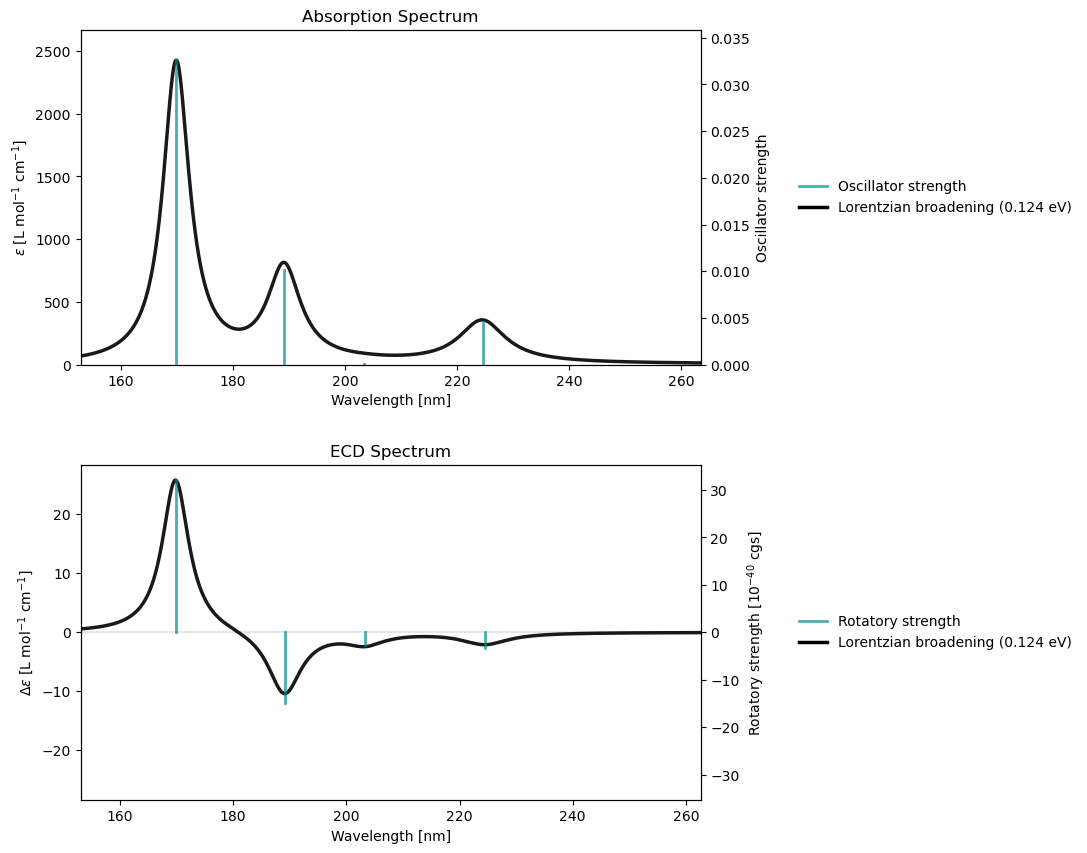

In [4]:
rpa_solver.plot(rpa_results)